# \[Week2] 머신러닝 기초

## 1. 머신러닝 기본 용어 정리
[강의링크](https://edu.goorm.io/learn/lecture/4012/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%9D%B4%EB%A1%A0-%EB%B0%8F-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%8A%B5)
04.머신러닝2(오버피팅언더피팅 극복하기 ~ ) 수강하시면 됩니다.  
당연히 그냥 구글링하셔도 됩니다.  
\*각 용어 정리는 본인이 추후에 보기 편한 방법으로 자유롭게 하시면 됩니다.  
참고) 소수점 셋째자리 아래는 버림하셔도 됩니다.

### overfitting & underfitting

1. 오버피팅(overfitting)이란?  
\[답변] training데이터에 대해 과할 정도로 정확하게 학습되어 training data에 대해서는 아주 높은 정확도를 보이지만, 다른 데이터를 넣어서 모델을 돌릴 경우 정확도가 낮아지는 경우

2. 언더피팅(underfitting)이란?  
\[답변] 학습 데이터가 충분하지 않거나 학습이 제대로 되지 않아서, 그래프를 그렸을 때 training data에 가깝게 가지 못한 경우. 모델이 너무 간단하기 때문에 학습 오류가 줄어들지 않

3. underfitting 막는 방법 2가지  
\[답변] 
    1. Find more features 
    2. Try high variance machine learning modells (의사결정나무, k-NN, SVM)

4. overfitting 판단 방법  
\[답변] training data와 test data의 정확도 그래프를 본다. 그래프에서 training data의 오차는 갈수록 낮아지지만 test data는 어느 한 점을 기준으로 오차가 줄어들었다 다시 증가한다면, training data가 overfitting되었다고 판단할 수 있다.

5. overfitting 막는 방법  
\[답변] 
    1. 정규화(Regularization) 
    2. Cross Validation 
    3. Add more data as much as possible 
    4. Deep learning에서 사용하는 기법
        1. Early stopping
        2. Drop Out

### Norm  
아래 수식은 파이썬으로 작성 : x는 numpy array로 가정   
힌트) abs 함수 쓸 것

1. Norm 수식   
\[답변] numpy.power(numpy.sum(numpy.power(numpy.abs(x),p),1/p)

$$ (\sum_{i=1}^n |x_i|^p)^\frac{1}{p} $$



2. L1 Norm 수식    
\[답변] numpy.sum(numpy.abs(x))
$$ (\sum_{i=1}^n |x_i|) $$

3. L2 Norm 수식  
\[답변] numpy.sqrt(numpy.sum(numpy.power(x,2)))
$$ (\sum_{i=1}^n |x_i|^2)^\frac{1}{2} $$

4. L2 Norm이 사용되는 Machine Learning 알고리즘   
\[답변]
    1. kNN algorithm
    2. kmean algorithm

### PCA 차원 축소

### Confusion Matrix (혼동 행렬)  
![image](https://user-images.githubusercontent.com/45345120/94503235-f23a4680-0240-11eb-9fae-86768d58ff58.png)

1. Confusion matrix 그리기

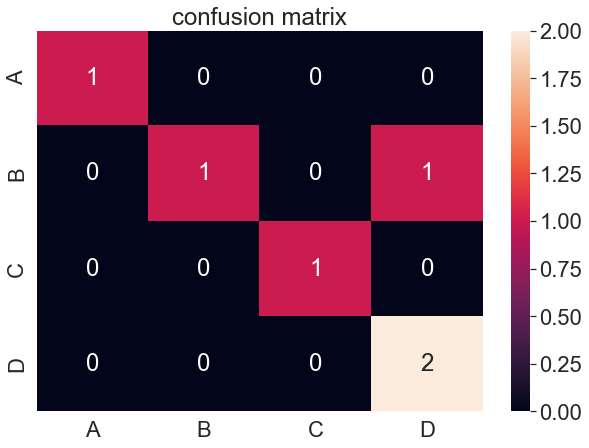

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)
array = [[1,0,0,0],[0,1,0,1],[0,0,1,0],[0,0,0,2]]
df_cm = pd.DataFrame(array, index=["A","B","C","D"],
                        columns=["A","B","C","D"])
plt.figure(figsize=(10,7))
plt.title('confusion matrix')
# heatmap 그리기 - 매트릭스 안에 숫자 나오도록 설정
sns.heatmap(df_cm, annot=True)

2. Confusion Matrix with normalization

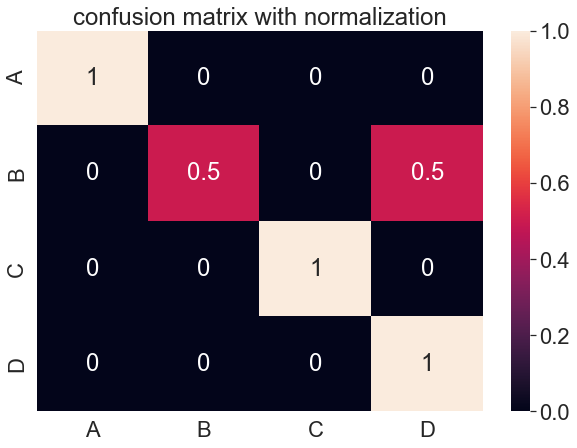

In [4]:
# 위의 셀을 먼저 실행한 후 실행해주세요, 변수 임의로 추가 가능
import numpy as np

total = np.sum(array, axis = 1)
array = array / total[:, None]
df_cm = pd.DataFrame(array, index=["A","B","C","D"],
                        columns=["A","B","C","D"])
plt.figure(figsize=(10,7))
plt.title('confusion matrix with normalization')
sns.heatmap(df_cm, annot=True)

### 다중 분류 모델 성능 평가  
![image](https://user-images.githubusercontent.com/45345120/94510085-dc348200-0250-11eb-95fd-0f678b6f9e70.png)   
위의 표를 보고 모델 성능을 측정해봅시다. (소수점 셋째자리에서 반올림)

0. **A의** (1)TP, (2)TN, (3)FP, (4)FN 을 각각 구하시오.  
\[(1)답]  9   
\[(2)답]  15+3+1+0+24+1+4+1+15=64   
\[(3)답]  1+5+0=6     
\[(4)답]  1+0+0=1   

1. Accuracy  
\[계산 과정]   (9+15+24+15)/80  
\[답]  0.79

2. Average Precision  
\[계산 과정]    
P(A) = 9/(9+1+5+0) = 0.6  
P(B) = 15/(1+15+0+4) = 0.75  
P(C) = 24/(0+3+24+1) = 0.86  
P(D) = 15/(0+1+1+15) = 0.88   
AP = (0.6+0.75+0.86+0.88)/4 = 0.77  
\[답]  
0.77 
    

3. Average Recall  
\[계산 과정]   
R(A) = 9/(9+1+0+0) = 0.9  
R(B) = 15/(1+15+3+1) = 0.75  
R(C) = 24/(5+0+24+1) = 0.8  
R(D) = 15/(0+4+1+15) = 0.75   
AR = (0.6+0.75+0.86+0.88)/4 = 0.8    
\[답]  
0.8

4. f1 score  
\[계산 과정]  
f1 score = 2x0.77x0.8/(0.77+0.8) = 0.78  
\[답]  
0.78

## 2. 머신러닝 알고리즘 - 알고리즘 2개\[필수] 선택해서 작성 (다 하셔도 됩니다!)   
### 선택한 알고리즘 옆에 **❄**를 붙여주세요.  
사진을 추가해도 되고 자유 형식입니다.
[강의링크](https://edu.goorm.io/learn/lecture/4012/%2525EB%2525A8%2525B8%2525EC%25258B%2525A0%2525EB%25259F%2525AC%2525EB%25258B%25259D-%2525EC%25259D%2525B4%2525EB%2525A1%2525A0-%2525EB%2525B0%25258F-%2525ED%25258C%25258C%2525EC%25259D%2525B4%2525EC%25258D%2525AC-%2525EC%25258B%2525A4%2525EC%25258A%2525B5#) (머신러닝1, 머신러닝2-kmeans)

### 1. KNN(k-Nearest Neighbors) ❄ 

1. KNN 알고리즘 정리    
\[답변] 최근접 이웃 알고리즘  
    * 새로운 샘플 가까운 거리에 있는 k개(홀수)의 라벨을 함께 본다.  
    * 그리고 가장 빈도(유클리드 거리 or bound안에 걸리는 개수)가 높은 것을 통해 분류한다.

In [5]:
# 아래 pass 부분을 지우고 내용을 채워주세요.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# iris data 로드
iris = load_iris()
# data split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

# classifier 객체 생성
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)    # n_neighbors = 1 / n_jobs = -1 
# n_neighbors 가 뜻하는 것? [답변] 가장 가까운 이웃을 몇 개를 고를지에 대한 파라미터
# n_jobs 가 뜻하는 것? [답변] 사용할 코어의 개수, -1이면 모든 코어를 사용한다는 의미.
knn.fit(x_train, y_train)       # x_train, y_train 이용해 트레이닝

prediction = knn.predict(x_test)       # knn 이용해 x_test 예측
results = [iris.target_names[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(knn.score(x_test, y_test)))         # x_test, y_test를 이용해 정확도 측정

results의 처음 6개 ==> ['virginica', 'versicolor', 'setosa', 'virginica', 'setosa', 'virginica']
score 메소드 이용 ==> 0.978


### 2. Decision Tree 

1. Decision Tree 알고리즘 정리    
\[답변] 

2. (1) Entropy (2)Information Gain 정리  
\[(1)답변]    
\[(2)답변]   

3. Information Gain 구하기  
<table>
    <thead>
        <th>ID</th>
        <th>Cartoon</th>
        <th>WinterFamilyPhoto</th>
    </thead>
    <tbody>
        <tr>
            <td>1</td>
            <td>No</td>
            <td>Yes</td>
        </tr>
        <tr>
            <td>2</td>
            <td>Yes</td>
            <td>No</td>
        </tr>
        <tr>
            <td>3</td>
            <td>Yes</td>
            <td>No</td>
        </tr>
        <tr>
            <td>4</td>
            <td>No</td>
            <td>No</td>
        </tr>
    </tbody>
</table>

(1) 위의 표 상황에서의 Entropy 구하기  
\[답변] E(WinterFamilyPhoto) =   
</br>
(2) Cartoon 기준으로 나눴을 때, Information gain 구하기  
\[답변] IG(WinterFamilyPhoto, Cartoon) = 

In [ ]:
# 아래 pass 부분을 지우고 내용을 채워주세요.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
# iris data 로드
iris = load_iris()
# data split
x_train, x_test, y_train, y_test = pass      # x : iris.data / y : iris.target / test_size=0.3 / random_state=0
# classifier 객체 생성
decision_tree = pass    # random_state = 0 / max_depth=2 
# max_depth 의미? [답변] 
decision_tree.pass          # x_train, y_train 이용해 트레이닝
r = pass         # export_text 함수를 이용해 decision_tree 출력
print(r)

prediction = decision_tree.pass      # decision tree 이용해 x_test 예측
results = [iris.target_names[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(decision_tree.pass))          # x_test, y_test를 이용해 정확도 측정

### 3. Naive Bayes

1. 조건부 확률   
\[답변]

2. 베이즈 정리  
\[답변]

3. 확률 계산  
<table>
    <thead>
        <th>Index</th>
        <th>Email</th>
        <th>Spam</th>
    </thead>
    <tbody>
        <tr>
            <td>1</td>
            <td>I got <strong>free</strong> two movie ticket from your boy friend</td>
            <td>False</td>
        </tr>
        <tr>
            <td>2</td>
            <td><strong>free</strong> coupon from xx.com</td>
            <td><strong>True</strong></td>
        </tr>
        <tr>
            <td>3</td>
            <td>watch <strong>free</strong> new movie from freemovie.com</td>
            <td><strong>True</strong></td>
        </tr>
        <tr>
            <td>4</td>
            <td>Best deal, promo code here</td>
            <td><strong>True</strong></td>
        </tr>
        <tr>
            <td>5</td>
            <td>There will be <strong>free</strong> pizza today 2pm meeting - your boss</td>
            <td>False</td>
        </tr>
        <tr>
            <td>6</td>
            <td>Scheduled meeting tomorrow</td>
            <td>False</td>
        </tr>
        <tr>
            <td>7</td>
            <td>Can we have lunch today?</td>
            <td>False</td>
        </tr>
        <tr>
            <td>8</td>
            <td>I miss you</td>
            <td>False</td>
        </tr>
        <tr>
            <td>9</td>
            <td>thanks my friend</td>
            <td>False</td>
        </tr>
        <tr>
            <td>10</td>
            <td>It was good to see you today</td>
            <td>False</td>
        </tr>
    </tbody>
</table>

(1) Spam 메일일 확률    
\[답변] P(Spam) =


(2) 메일에 "free" 단어가 포함되어 있을 확률  
\[답변] P("free") = 

(3) 스팸 메일에 "free" 단어가 포함되어 있을 확률   
\[답변] P("free" | Spam) = 

(4) 메일에 "free" 단어가 포함되어 있을 경우 이 메일이 스팸일 확률  
\[답변] P(Spam | "free") = 

In [ ]:
# 아래 pass 부분을 지우고 내용을 채워주세요.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# iris data 로드
iris = load_iris()
# data split
x_train, x_test, y_train, y_test = pass # x : iris.data / y : iris.target / test_size=0.3 / random_state=0
# classifier 객체 생성
gnb = pass
gnb.pass         # x_train, y_train 이용해 트레이닝

prediction = gnb.pass       # gnb 이용해 x_test 예측
results = [iris.target_names[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(gnb.pass))        # x_test, y_test를 이용해 정확도 측정  

### 4. SVM (Support Vector Machine)

1. SVM 알고리즘 정리  
\[답변]

2. SVM 파라미터 2가지  
\[답변] 

3. Grid Search 정리  
\[답변]

In [ ]:
# 아래 pass 부분을 지우고 내용을 채워주세요.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# iris data 로드
iris = load_iris()
# data split
x_train, x_test, y_train, y_test = pass      # x : iris.data / y : iris.target / test_size=0.3 / random_state=0
# classifier 객체 생성
svc = pass
svc.pass            # x_train, y_train 이용해 트레이닝

prediction = svc.pass       # svc 이용해 x_test 예측
results = [iris.target_names[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(svc.pass))          # x_test, y_test를 이용해 정확도 측정

### 5. Linear Regression

1. Classification VS Regression  
\[답변] 

3. Mean Square Error 란?  
\[답변] 

4. Error = h(x) - y 일 때 Mean Square Error   
\[답변] Mean Square Error = 

5. Gradient Descent 정리  
\[답변]

In [ ]:
# 아래 pass 부분을 지우고 내용을 채워주세요.
# 이 예제에서는 sepal length를 예측해봅시다.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# Load Iris Data
iris = load_iris()
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)        
target_df = pd.DataFrame(data= iris.target, columns= ['species'])
# Converting Objects to Numerical dtype
iris_df = pd.concat([iris_df, target_df], axis= 1)

iris_df

In [ ]:
from sklearn.linear_model import LinearRegression
x = iris_df.pass        # 'sepal length (cm)' column drop
y = iris_df['sepal length (cm)']    
# data split
x_train, x_test, y_train, y_test = pass    # test_size=0.3 / random_state=0
# classifier 객체 생성
lr = pass
lr.pass         # x_train, y_train 이용해 트레이닝

prediction = lr.pass           # lr 이용해 x_test 예측 
print('실제 값의 처음 6개 ==> {}'.format(y_test.values[:6]))
print('results의 처음 6개 ==> {}'.format(prediction[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(lr.pass))       # x_test, y_test를 이용해 정확도 측정

### 6. Logistic Regression ❄

1. Linear regression VS Logistic Regression  
\[답변] Linear regression은 종속변수와 독립변수 사이의 관계를 설정하는 데 사용되며, 이는 독립변숙가 변경되는 경우 종속변수를 추정하는 데 유용하다. Logistic regression도 마찬가지이나, 종속 변수가 이진(T/F)이며 주료 분류에 이용한다. Linear는 직선양의 그래프를 이용하여 분류하는 반면 Logistic은 Sigmoid 함수를 사용하여 S자를 띄고 있어서 좀 더 정확하다

2. Sigmoid Function 정리  
\[답변]  
Binary Logistic Regression에 주로 사용된다. 시그모이드 함수는 결과 값을 0 또는 1로 반환하기 때문에 두 가지로 분류할 때 유용하다.

3. Cost function?  
\[답변]  
예측을 하는 값과 실제 결과 값의 차이를 나타내는 함수. cost function이 최소가 되는 경우가 가장 이상적인 예측이 이루어지는 때이다.

In [ ]:
# 아래 pass 부분을 지우고 내용을 채워주세요.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# iris data 로드
iris = load_iris()
# data split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.targetm test_size=0.3, random_state=0)

# classifier 객체 생성
lr = LogisticRegression()
lr.fit(x_train, y_train)             # x_train, y_train 이용해 트레이닝

prediction = lr.predict(x_test)           # lr 이용해 x_test 예측
results = [iris.target_names[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(lr.score(x_test, y_test)))       # x_test, y_test를 이용해 정확도 측정

### 7. 랜덤 포레스트 Random Forest 

1. Random Forest 알고리즘 정리  
\[답변]

In [ ]:
# 아래 pass 부분을 지우고 내용을 채워주세요.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# iris data 로드
iris = load_iris()
# data split
x_train, x_test, y_train, y_test = pass      # x : iris.data / y : iris.target / test_size=0.3 / random_state=0
# classifier 객체 생성
clf = pass       # max_depth = 2 / random_state = 0
# max_depth 의미? [답변]
clf.pass         # x_train, y_train 이용해 트레이닝

prediction = clf.pass           # clf 이용해 x_test 예측
results = [iris.target_names[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(clf.pass))          # x_test, y_test를 이용해 정확도 측정

### 8. 앙상블

1. Ensemble 기법 정리  
\[답변]

2. hard voting VS soft voting  
\[답변] 

### 9. kmean 클러스터링

1. k-mean 알고리즘 단계 - 추가 및 제거 가능  
(1)
<br>
(2)
<br>
(3)
<br>
(4)
<br>
(5)
<br>
(6)
<br>

2. clustering이 끝났다고 판단되는 경우?  
\[답변]

3. 초기 centroid 결정하는 방법 3가지와 그에 대한 설명  
\[답변(1)]
<br>
\[답변(2)] 
<br>
\[답변(3)]


4. KMeans 사용해보기

In [ ]:
# 필요한 패키지 import
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Create data points
array = [[3,1], [4,1], [3,2], [4,2],
         [10,5], [10,6], [11,5], [11,6],
         [15,1], [15,2], [16,1], [16,2]]
df = pd.DataFrame(array, columns=['x', 'y'])

# convert dataframe to numpy array
data_points = df.values
kmeans = pass    # cluster 개수 = 3 으로 KMeans clustering
df['cluster_id'] = pass # clustering된 각 점의 cluster 번호 저장

# Visualize data point
sns.lmplot('x', 'y', data=df, fit_reg=False,                    
            scatter_kws={"s": 200},
            hue="cluster_id")
plt.title("kmean plot")
plt.xlabel("x")
plt.ylabel("y")
